## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import warnings

# Sklearn Core
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

plt.style.use('ggplot')
SEED = 42

C:\Users\filbe\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and Prepare Data

In [23]:
def load_and_prep_data(filepath):
    """
    Loads data and creates the classification target based on Exam_Score.
    """
    df = pd.read_csv(filepath)
    df.drop('student_id', axis=1, inplace=True)
    
    # Drop duplicates if any
    df = df.drop_duplicates()
    
    # CLASSIFICATION LOGIC:
    # We map the continuous Exam_Score to 3 classes:
    # 0: Low Performance (< 65)
    # 1: Average Performance (65 - 79)
    # 2: High Performance (>= 80)
    def categorize_score(score):
        if score >= 85:
            return "Distinction"
        elif score >= 65:
            return "Good"
        elif score >= 50:
            return "Pass"
        else:
            return "Fail"

    # Create Target
    df['Performance_Category'] = df['exam_score'].apply(categorize_score)
    
    # Drop the original continuous target to prevent data leakage
    df = df.drop(columns=['exam_score'])
    
    return df

# Execution
df = load_and_prep_data('student habits performance.csv')
print(f"Data Loaded. Shape: {df.shape}")
print(f"Class Distribution:\n{df['Performance_Category'].value_counts(normalize=True)}")

Data Loaded. Shape: (1000, 15)
Class Distribution:
Performance_Category
Good           0.433
Pass           0.248
Distinction    0.188
Fail           0.131
Name: proportion, dtype: float64


In [ ]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,Performance_Category
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,Pass
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,Distinction
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,Fail
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,Fail
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,Good
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,Good
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,Pass
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,Good


## Exploratory Data Analysis

Generating plots for 14 features...


C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


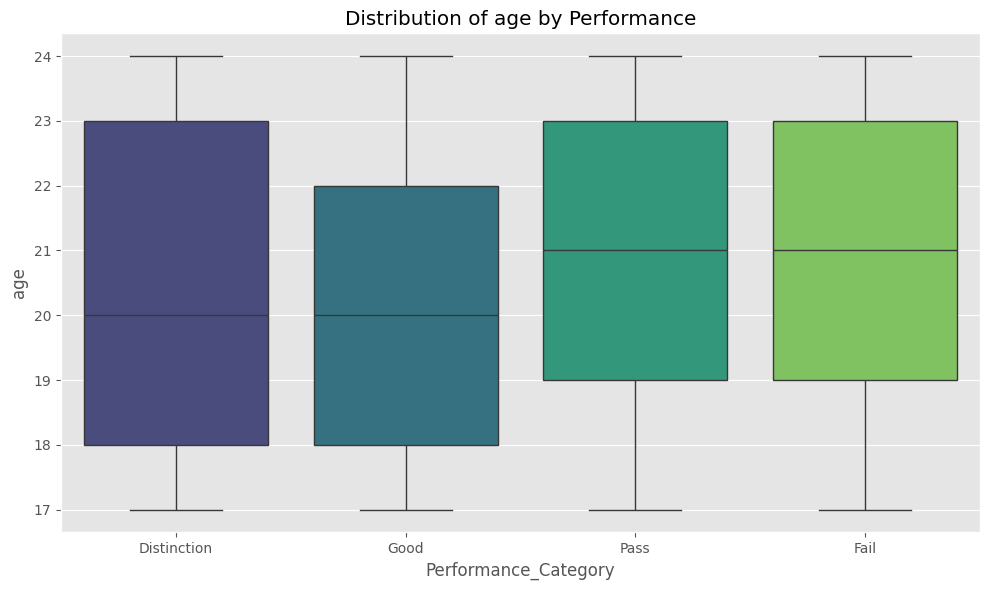

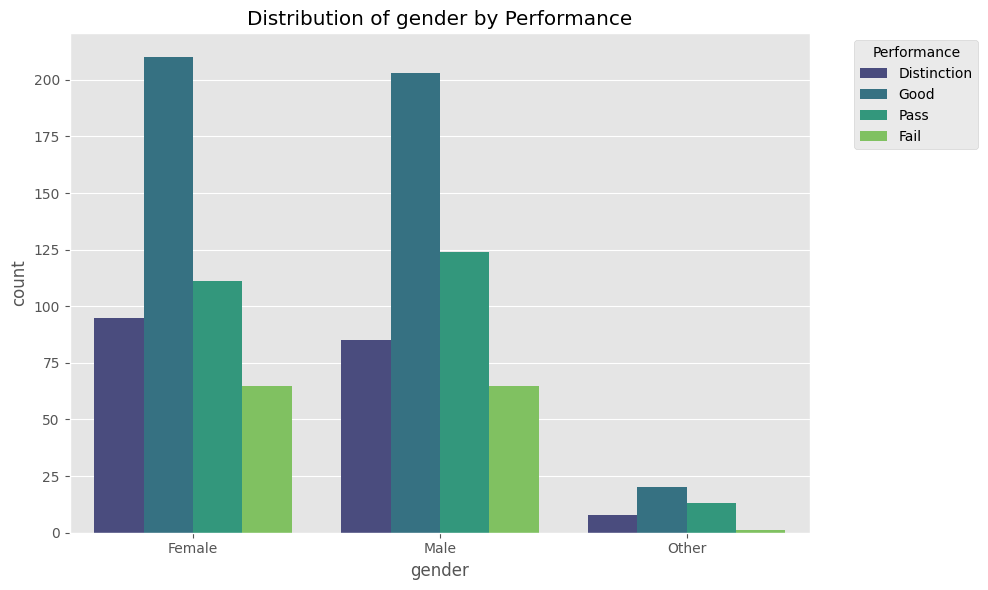

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


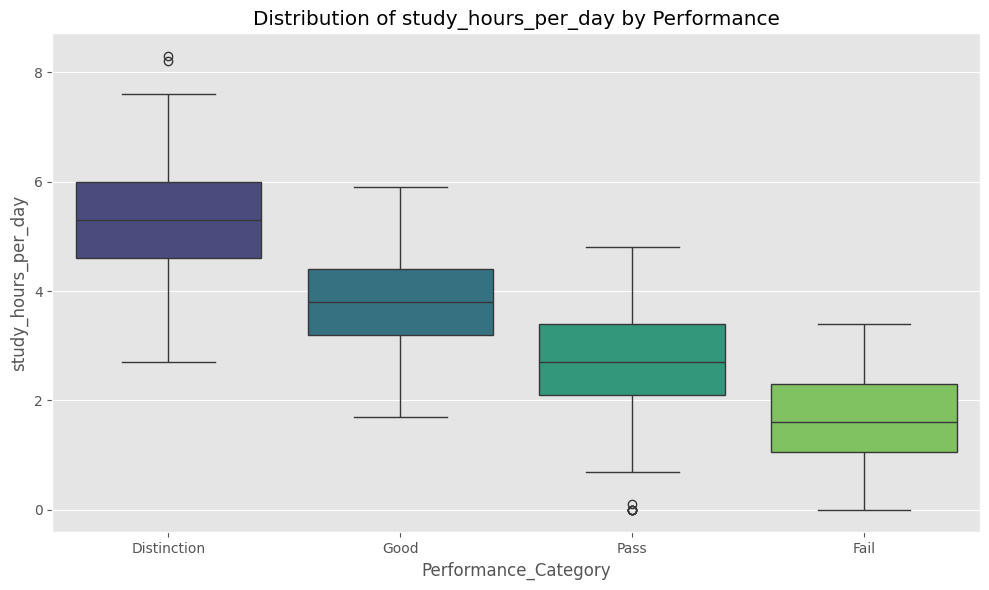

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


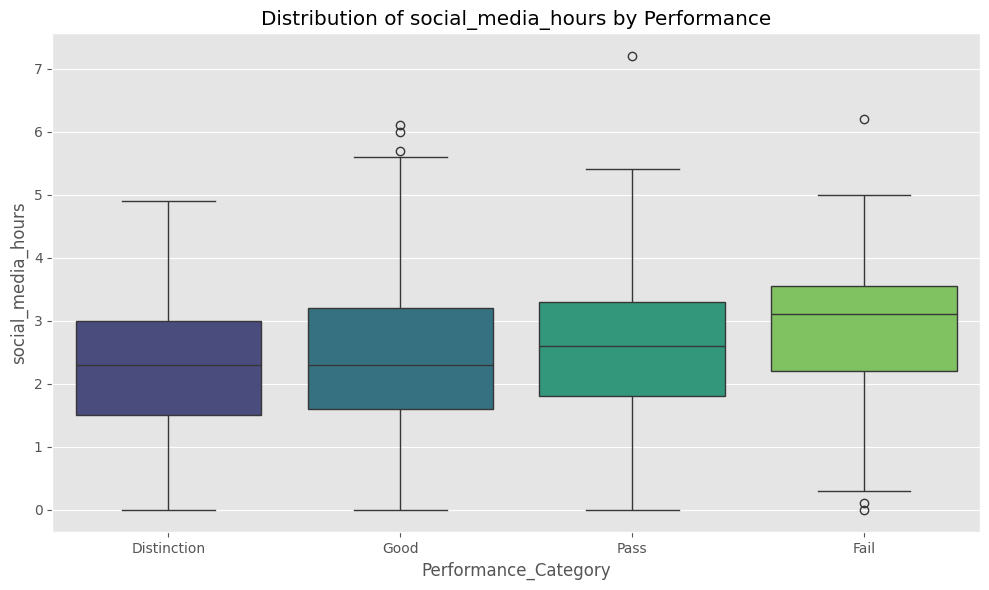

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


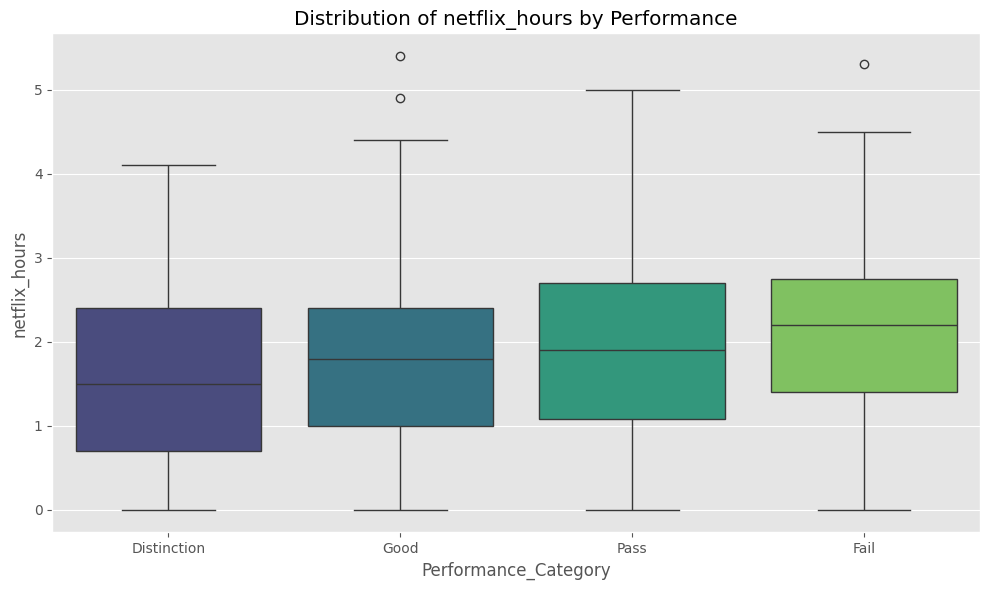

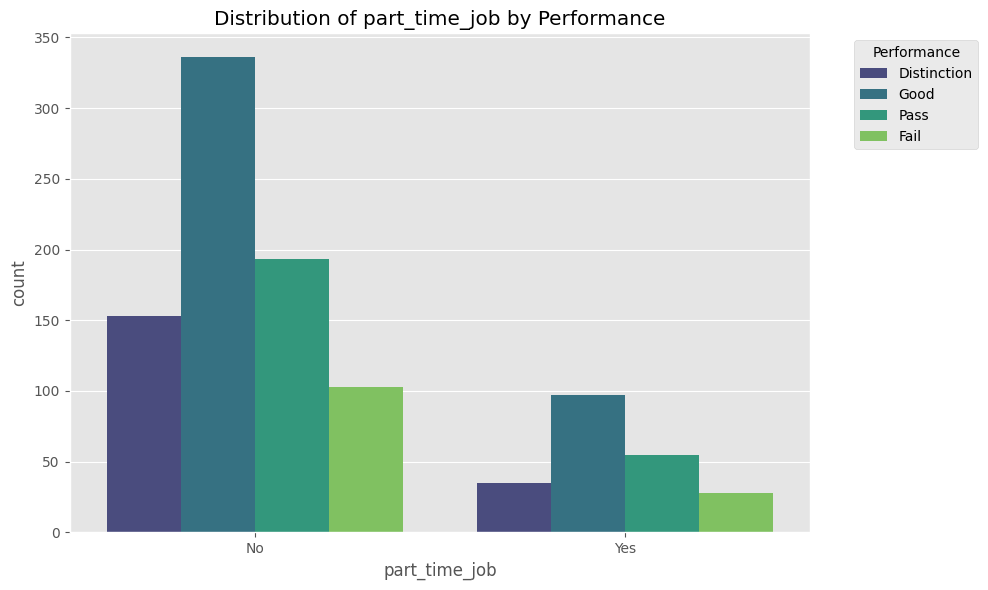

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


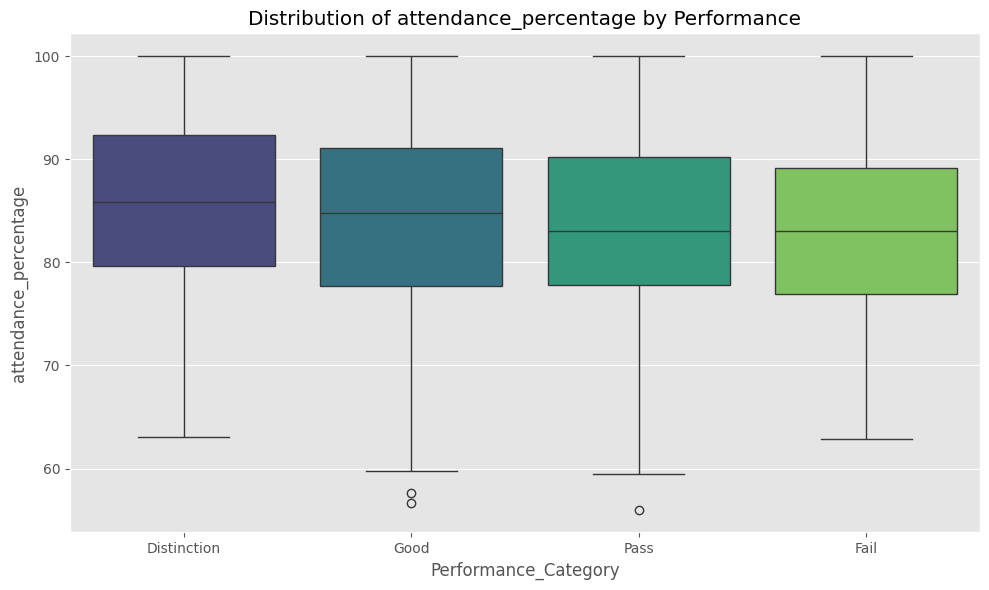

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


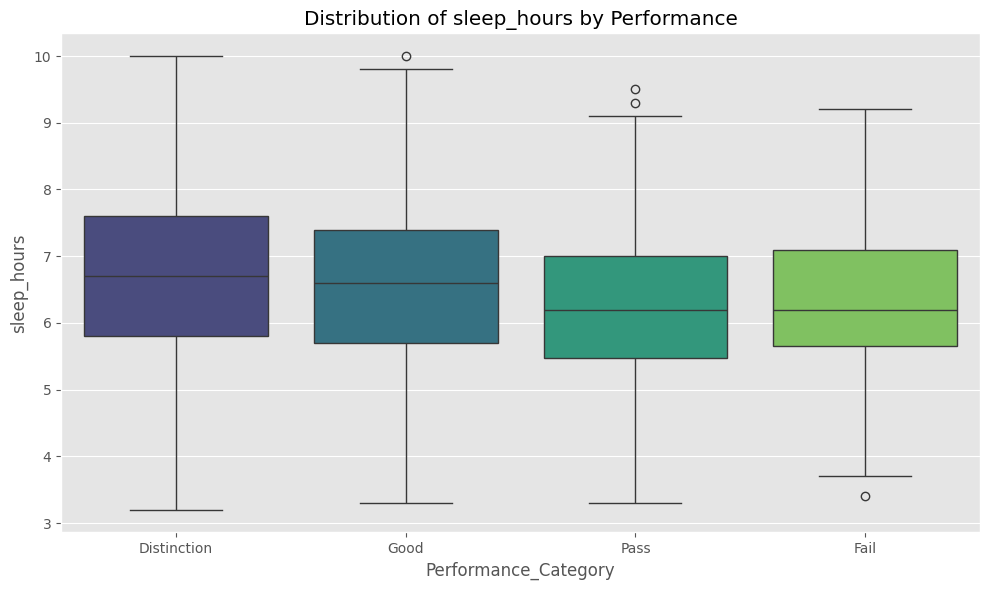

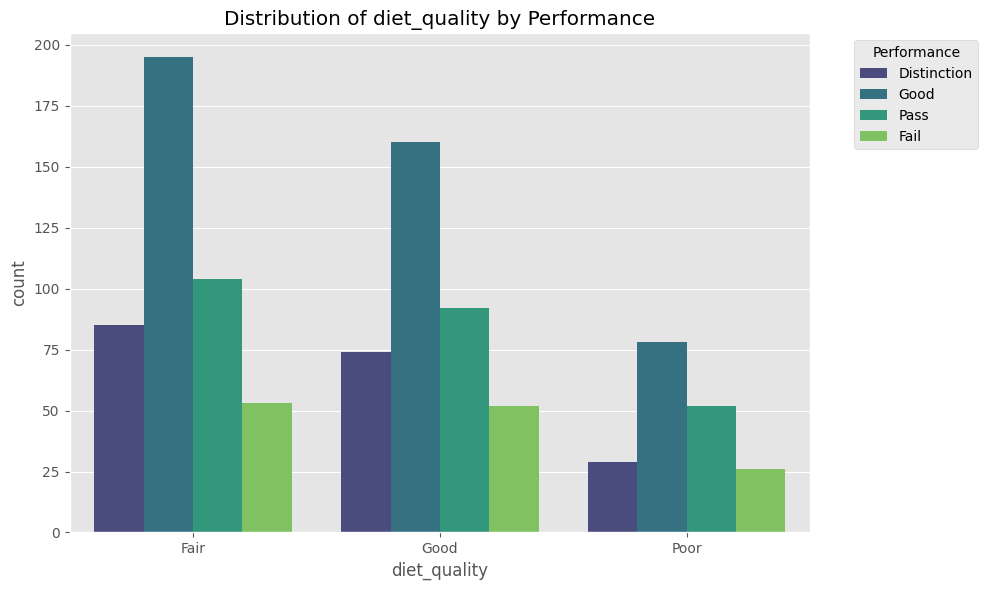

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


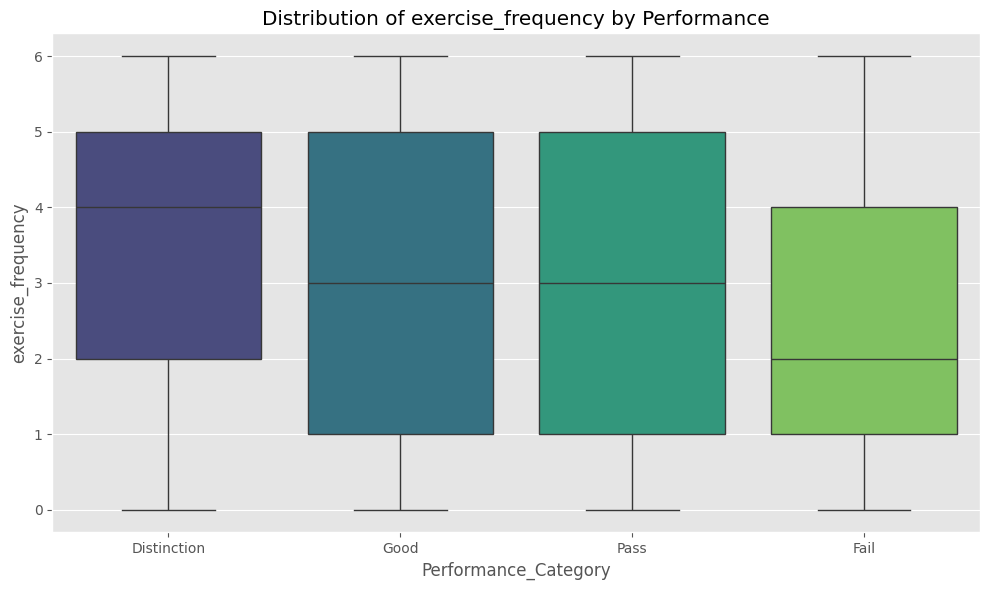

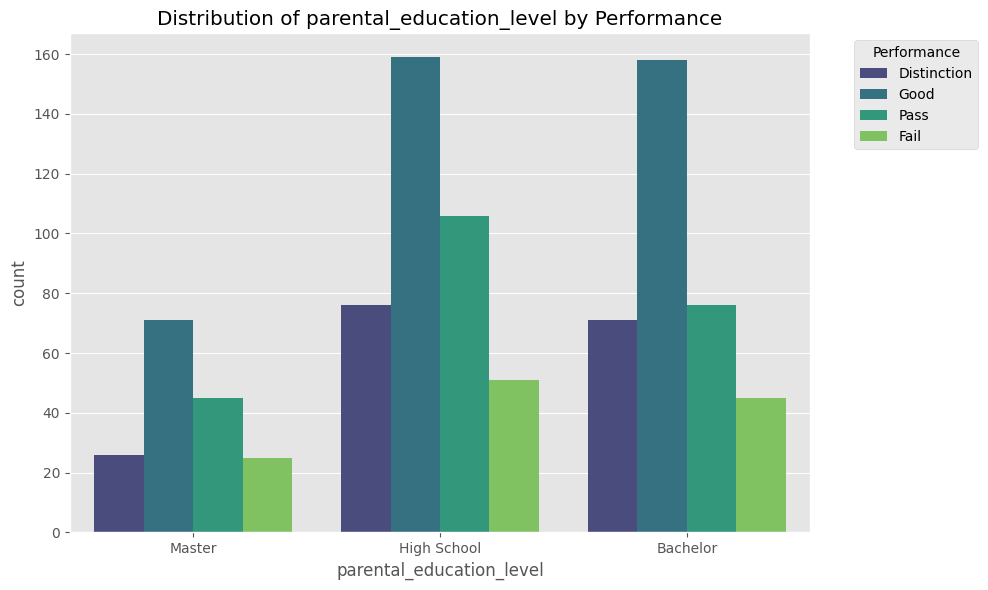

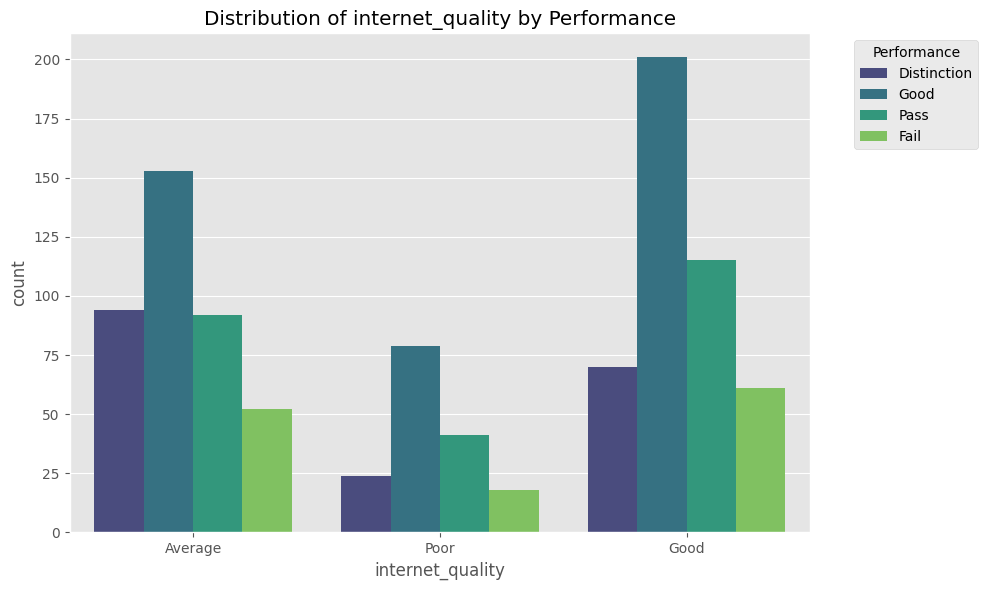

C:\Users\filbe\AppData\Local\Temp\ipykernel_36808\500461777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')


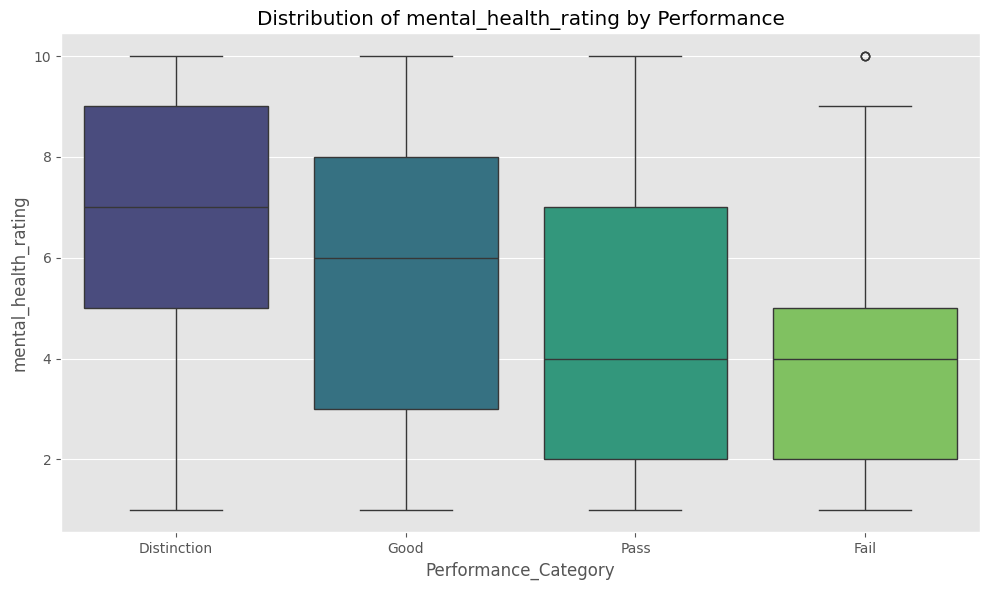

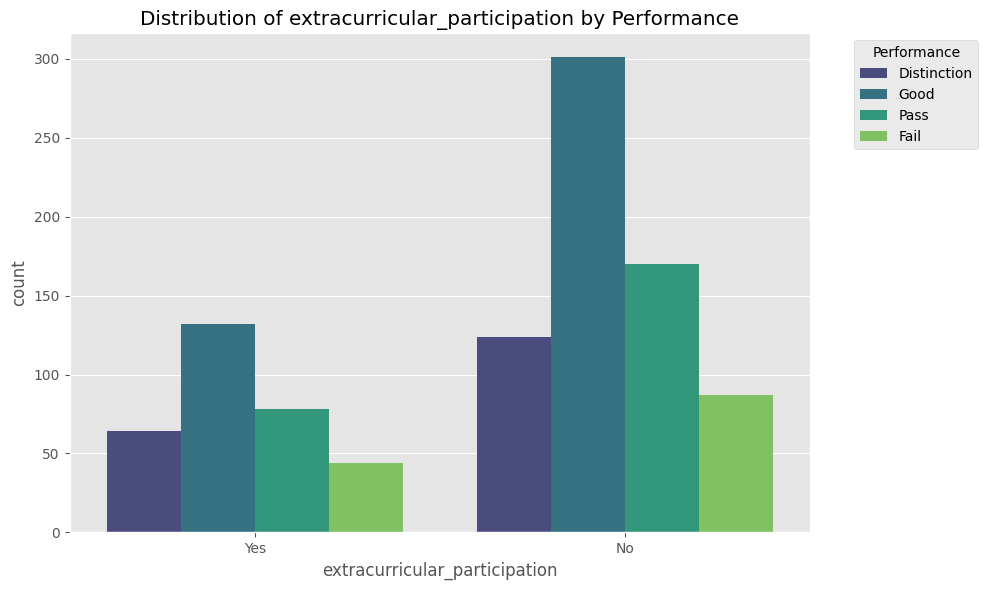

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_comprehensive_eda(df, target_col='Performance_Category'):
    """
    Iterates through all columns in the dataframe and plots them against the target.
    - Numerical features: Boxplot
    - Categorical features: Countplot (Grouped Bar Chart)
    """
    # Define the order for the target categories to keep plots consistent
    category_order = ["Distinction", "Good", "Pass", "Fail"]
    
    # Separate features
    features = [col for col in df.columns if col != target_col]
    
    print(f"Generating plots for {len(features)} features...")

    for col in features:
        plt.figure(figsize=(10, 6))
        
        # Check data type
        if pd.api.types.is_numeric_dtype(df[col]):
            # Plot Numerical Feature vs Target
            sns.boxplot(x=target_col, y=col, data=df, order=category_order, palette='viridis')
            plt.title(f'Distribution of {col} by Performance')
        else:
            # Plot Categorical Feature vs Target
            sns.countplot(x=col, hue=target_col, data=df, hue_order=category_order, palette='viridis')
            plt.title(f'Distribution of {col} by Performance')
            plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
            
        plt.tight_layout()
        # plt.savefig(f'plot_{col}.png') # Save plot
        plt.show() # Display plot

# Execution using the dataframe 'df' prepared in the previous step
perform_comprehensive_eda(df)

## Feature Engineering

In [28]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,Performance_Category
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,Pass
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,Distinction
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,Fail
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,Fail
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,Good
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,Good
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,Pass
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,Good


In [29]:
def feature_engineering(X):
    """
    Custom function to create domain-specific features.
    Designed to work within a FunctionTransformer.
    """
    X_new = X.copy()
    
    # Feature 1: Effective Study Score (Interaction)
    # Rationale: Studying a lot matters less if attendance is poor.
    # Check if columns exist to prevent errors
    if 'study_hours_per_day' in X_new.columns and 'attendance_percentage' in X_new.columns:
        X_new['Effective_Study'] = X_new['study_hours_per_day'] * (X_new['attendance_percentage'] / 100)
        
    # Feature 2: Wellness Index (Aggregation)
    # Rationale: Sleep and Physical activity contribute to cognitive function.
    if 'sleep_hours' in X_new.columns and 'mental_health_rating' in X_new.columns:
        X_new['Wellness_Index'] = X_new['sleep_hours'] + X_new['mental_health_rating']
        
    return X_new

# Separate Features and Target
X = df.drop('Performance_Category', axis=1)
y = df['Performance_Category']


classes = sorted(y.unique())
reversed_mapping = {cls: len(classes) - 1 - i for i, cls in enumerate(classes)}
print("Reversed Mapping Rules:", reversed_mapping)
y_encoded = y.map(reversed_mapping)

# Encode Target to Integers (Required for XGBoost)
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
class_names = list(reversed_mapping.keys())
# print(f"Target Mapping: {dict(zip(range(len(class_names)), class_names))}")

# Split: 70% Train, 15% Validation, 15% Test
# First, split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.30, stratify=y_encoded, random_state=SEED
)
# Split Temp into Val (15%) and Test (15%) -> 50% of 30% is 15% total
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

print(f"Train Shape: {X_train.shape}, Val Shape: {X_val.shape}, Test Shape: {X_test.shape}")

Reversed Mapping Rules: {'Distinction': 3, 'Fail': 2, 'Good': 1, 'Pass': 0}
Train Shape: (700, 14), Val Shape: (150, 14), Test Shape: (150, 14)


In [25]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Performance_Category
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,Good
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,Pass
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,Good
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,Good
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,Good
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,Good
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,Good
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,Good


## Processing Pipeline

In [37]:
all_features_list = df.columns.tolist()
all_features_list

['age',
 'gender',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'part_time_job',
 'attendance_percentage',
 'sleep_hours',
 'diet_quality',
 'exercise_frequency',
 'parental_education_level',
 'internet_quality',
 'mental_health_rating',
 'extracurricular_participation',
 'Performance_Category']

In [30]:
# Identify Column Types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 1. Numeric Transformer: Impute median -> Scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2. Categorical Transformer: Impute freq -> OneHot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combine into Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Create Feature Engineering Transformer
feature_eng_transformer = FunctionTransformer(feature_engineering, validate=False)

# 5. Full Pipeline Construction (Preprocessing Only)
# Note: We apply feature engineering BEFORE column transformation to ensure new columns are processed
def get_pipeline(classifier):
    return Pipeline(steps=[
        ('feat_eng', feature_eng_transformer),
        # Note: We would need to update column lists dynamically for ColumnTransformer 
        # if Feature Engineering adds columns. 
        # For simplicity in this demo, we assume Feature Engineering happens inside the 
        # Optuna loop or we treat 'preprocessor' as dealing with original columns.
        # *Correction for Robustness*: In production, we usually run FE first, then define 
        # ColumnTransformer on the new dataframe structure. 
        # To keep it simple for this script, we will apply FE logic inside the pipeline 
        # but let the ColumnTransformer handle the output "passthrough" or re-selector.
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

## Hyperparameter Tuning

In [31]:
def objective(trial):
    """
    Optuna objective function to optimize Random Forest and XGBoost.
    """
    classifier_name = trial.suggest_categorical('classifier', ['RandomForest', 'XGBoost'])
    
    if classifier_name == 'RandomForest':
        param = {
            'n_estimators': trial.suggest_int('rf_n_estimators', 50, 300),
            'max_depth': trial.suggest_int('rf_max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 15),
            'class_weight': 'balanced'
        }
        clf = RandomForestClassifier(**param, random_state=SEED, n_jobs=-1)
        
    else: # XGBoost
        param = {
            'n_estimators': trial.suggest_int('xgb_n_estimators', 50, 300),
            'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
            'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
            'eval_metric': 'mlogloss'
        }
        clf = XGBClassifier(**param, random_state=SEED, n_jobs=-1)

    # Build Pipeline
    # IMPORTANT: We apply feature engineering to X_train before passing to CV
    # to handle the dynamic column issue mentioned above, 
    # or we ensure the preprocessor handles the output of feature_engineering.
    # Here we simplify:
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # 3-Fold Stratified Cross-Validation on TRAIN set
    # We optimize for 'f1_weighted' due to potential class imbalance
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted')
    return scores.mean()

# Run Optimization
print("Starting Optuna Study...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20) # Increase n_trials for better results

print(f"Best Classifier: {study.best_params['classifier']}")
print(f"Best F1 Score: {study.best_value:.4f}")

[I 2025-12-03 15:17:21,878] A new study created in memory with name: no-name-30778203-a020-4882-919f-d1b20e69ad26


Starting Optuna Study...


[I 2025-12-03 15:17:23,448] Trial 0 finished with value: 0.6465338633080929 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 169, 'rf_max_depth': 22, 'rf_min_samples_split': 11}. Best is trial 0 with value: 0.6465338633080929.
[I 2025-12-03 15:17:24,897] Trial 1 finished with value: 0.6922976984123222 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 131, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.06377618505270288, 'xgb_subsample': 0.9504575796226218, 'xgb_colsample_bytree': 0.8377506911763284}. Best is trial 1 with value: 0.6922976984123222.
[I 2025-12-03 15:17:26,333] Trial 2 finished with value: 0.6203022861203648 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 155, 'rf_max_depth': 5, 'rf_min_samples_split': 10}. Best is trial 1 with value: 0.6922976984123222.
[I 2025-12-03 15:17:28,625] Trial 3 finished with value: 0.6568538830036541 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 273, 'rf_max_depth': 8, 'rf_min_samp

Best Classifier: XGBoost
Best F1 Score: 0.6996


## Final evaluation & Feature Importance


FINAL EVALUATION: XGBoost
Accuracy: 0.7533
F1 Score (Weighted): 0.7457

Classification Report:

              precision    recall  f1-score   support

 Distinction       0.69      0.47      0.56        38
        Fail       0.70      0.89      0.78        65
        Good       0.94      0.79      0.86        19
        Pass       0.88      0.79      0.83        28

    accuracy                           0.75       150
   macro avg       0.80      0.74      0.76       150
weighted avg       0.76      0.75      0.75       150



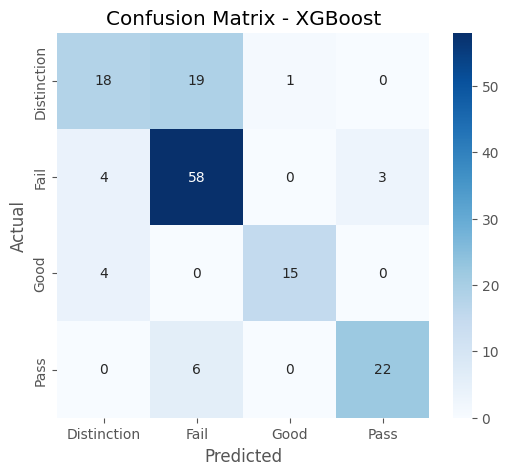

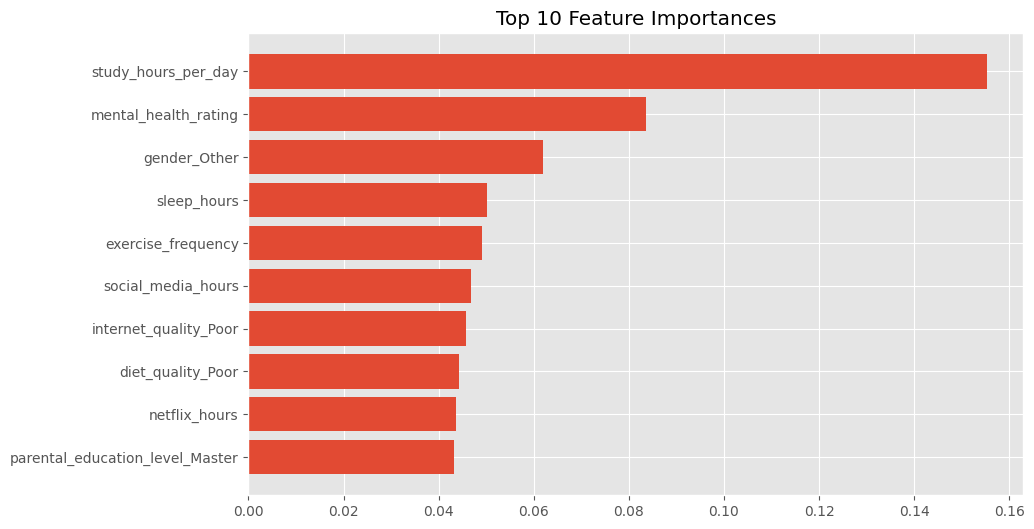

In [32]:
# Extract Best Params
best_params = study.best_params
model_type = best_params.pop('classifier')

# Instantiate Best Model
if model_type == 'RandomForest':
    # Clean keys for RF
    rf_params = {k.replace('rf_', ''): v for k, v in best_params.items()}
    final_clf = RandomForestClassifier(**rf_params, random_state=SEED, class_weight='balanced')
else:
    # Clean keys for XGB
    xgb_params = {k.replace('xgb_', ''): v for k, v in best_params.items()}
    final_clf = XGBClassifier(**xgb_params, random_state=SEED, eval_metric='mlogloss')

# Final Pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_clf)
])

# Train on Train + Validation set (Optional, but often good practice)
X_final_train = pd.concat([X_train, X_val])
y_final_train = np.concatenate([y_train, y_val])

final_pipeline.fit(X_final_train, y_final_train)

# Predict on Test Set
y_pred = final_pipeline.predict(X_test)

# --- METRICS ---
print("\n" + "="*30)
print(f"FINAL EVALUATION: {model_type}")
print("="*30)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {model_type}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- FEATURE IMPORTANCE ---
# Extracting feature names after OneHotEncoding is tricky but necessary for interpretation
if hasattr(final_clf, 'feature_importances_'):
    # Get transformed feature names
    try:
        # Access the preprocessor step
        prep = final_pipeline.named_steps['preprocessor']
        
        # Numeric names
        num_names = numeric_features
        
        # Categorical names
        cat_names = prep.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
        
        feature_names = np.r_[num_names, cat_names]
        importances = final_clf.feature_importances_
        
        # Plot Top 10
        indices = np.argsort(importances)[::-1][:10]
        plt.figure(figsize=(10, 6))
        plt.title("Top 10 Feature Importances")
        plt.barh(range(10), importances[indices], align="center")
        plt.yticks(range(10), feature_names[indices])
        plt.gca().invert_yaxis()
        plt.show()
    except Exception as e:
        print(f"Could not extract feature names directly: {e}")